# LIBRARIES IMPORTED

In [1]:
import cv2
import os
import numpy as np
from PIL import Image as im
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
%matplotlib inline 
from warnings import filterwarnings
filterwarnings('ignore')
import tensorflow as tf

In [2]:
def detect_face(img):
   
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\haarcascade_frontalface_alt.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=0);
    
    if (len(faces) == 0):
        return None, None
    
    (x, y, w, h) = faces[0]

    return gray, faces[0]

In [3]:
subjects = ["","Angelina", "Mohanlal","Mammotty","Gal Gadot"]

In [4]:
def prepare_training_data(data_folder_path):
    
    
    dirs = os.listdir(data_folder_path)
    faces = []
    labels = []
    
    for dir_name in dirs:
        
        
        if not dir_name.startswith("s"):
            continue;
            
        
        label = int(dir_name.replace("s", ""))
        
        subject_dir_path = data_folder_path + "\\" + dir_name
        
        subject_images_names = os.listdir(subject_dir_path)
        
    
        for image_name in subject_images_names:
            
            if image_name.startswith("."):
                continue;
            
            image_path = subject_dir_path + "\\" + image_name

            image = cv2.imread(image_path)
            
            cv2.imshow("Training on image...", image)
            cv2.waitKey(1)
            
            face, rect = detect_face(image)
            
            if face is not None:
                
                faces.append(face)
                labels.append(label)
            
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    
    return faces, labels


In [5]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN,1.3, (0, 255, 0), 2)

In [6]:
def predict(test_img):
    
    img = test_img.copy()
    
    face, rect = detect_face(img)
    

    
    label= face_recognizer.predict(face)
    
    print(label[0])
    
    
    
    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    return img

# Step1: Without Using Any Image Processing Technique

In [7]:
print("Preparing data...")
faces, labels = prepare_training_data("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\train_org")
print("Data prepared")

print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparing data...
Data prepared
Total faces:  132
Total labels:  132


# 1) LBPH Algorithm

In [8]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

faces=np.array(faces)
labels=np.array(labels)

face_recognizer.train(faces,labels)

p=[]

for i in range(1,45):
    
    test_img1 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\testing_org\\"+str(i)+".jpg")
    new_img1 = test_img1.resize((128,128))
    img_arr1=np.array(new_img1)
    
    img = img_arr1.copy()
    
    face, rect = detect_face(img)
    
    label= face_recognizer.predict(face)
    
    p.append(label[0])
    
    print(label[0])
    

    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
  
g=[1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]

c=0
for i in range(44):
    
    if(p[i]==g[i]):
        
       c=c+1
    

print("Accuracy Achieved is "+str(c*100/44)+"%")
acc_lb_w=c*100/44

1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
2
4
4
2
3
4
1
2
3
4
1
2
3
2
1
4
3
3
1
2
3
4
1
2
3
4
Accuracy Achieved is 88.63636363636364%


Predicting images...
3
4
Prediction complete


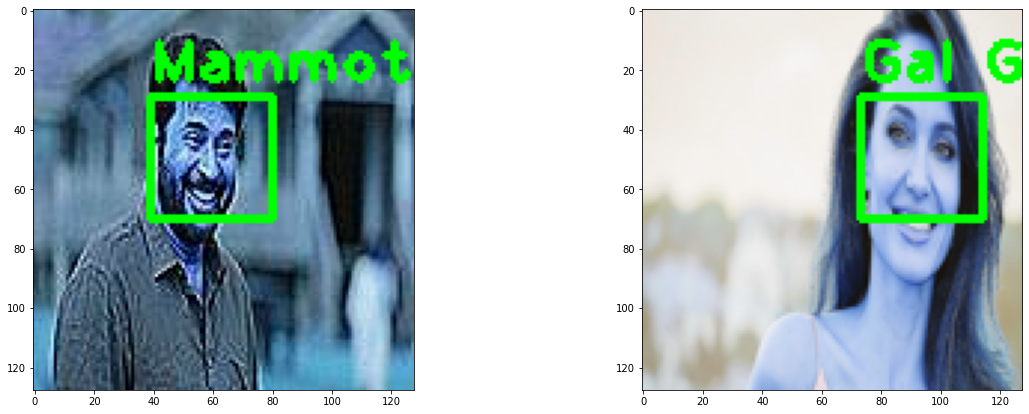

In [9]:
print("Predicting images...")


test_img1 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\testing_org\\15.jpg")
test_img2 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\testing_org\\21.jpg")


new_img1 = test_img1.resize((128,128))
new_img2 = test_img2.resize((128,128))
    
img_arr1=np.array(new_img1)
img_arr2=np.array(new_img2)
    


predicted_img1 = predict(img_arr1)
predicted_img2 = predict(img_arr2)

print("Prediction complete")

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.imshow(cv2.cvtColor(predicted_img1, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(predicted_img2, cv2.COLOR_BGR2RGB))


cv2.imshow("Face Recognition test", predicted_img1)
cv2.imshow("Face Recognition test", predicted_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()



# 2) EigenFace Algorithm

In [12]:
def predict(test_img):
    
    img = test_img.copy()
    
    face, rect = detect_face(img)
    

    
    label= face_recognizer1.predict(face)
    
    print(label[0])
    
    
    
    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    return img

In [10]:
face_recognizer1 = cv2.face.EigenFaceRecognizer_create()

faces=np.array(faces)
labels=np.array(labels)

face_recognizer1.train(faces,labels)

p=[]

for i in range(1,45):
    
    test_img1 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\testing_org\\"+str(i)+".jpg")
    new_img1 = test_img1.resize((128,128))
    img_arr1=np.array(new_img1)
    
    img = img_arr1.copy()
    
    face, rect = detect_face(img)
    
    label= face_recognizer1.predict(face)
    
    p.append(label[0])
    
    print(label[0])
    

    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
  
g=[1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]

c=0
for i in range(44):
    
    if(p[i]==g[i]):
        
       c=c+1
    

print("Accuracy Achieved is "+str(c*100/44)+"%")
acc_eigen_w=c*100/44

1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
2
4
3
2
3
4
1
2
3
4
1
2
3
2
1
2
3
2
1
2
3
4
1
2
3
4
Accuracy Achieved is 90.9090909090909%


Predicting images...
3
3
Prediction complete


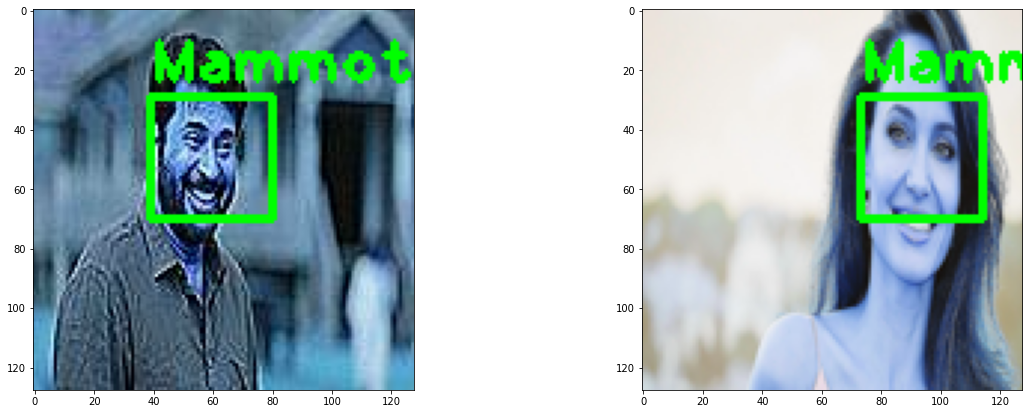

In [13]:
print("Predicting images...")


test_img1 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\testing_org\\15.jpg")
test_img2 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\testing_org\\21.jpg")


new_img1 = test_img1.resize((128,128))
new_img2 = test_img2.resize((128,128))
    
img_arr1=np.array(new_img1)
img_arr2=np.array(new_img2)
    


predicted_img1 = predict(img_arr1)
predicted_img2 = predict(img_arr2)

print("Prediction complete")

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.imshow(cv2.cvtColor(predicted_img1, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(predicted_img2, cv2.COLOR_BGR2RGB))


cv2.imshow("Face Recognition test", predicted_img1)
cv2.imshow("Face Recognition test", predicted_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()



# 3) Fisherface Algorithm

In [14]:
face_recognizer2 = cv2.face.FisherFaceRecognizer_create()

faces=np.array(faces)
labels=np.array(labels)

face_recognizer2.train(faces,labels)

p=[]

for i in range(1,45):
    
    test_img1 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\testing_org\\"+str(i)+".jpg")
    new_img1 = test_img1.resize((128,128))
    img_arr1=np.array(new_img1)
    
    img = img_arr1.copy()
    
    face, rect = detect_face(img)
    
    label= face_recognizer2.predict(face)
    
    p.append(label[0])
    
    print(label[0])
    

    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
  
g=[1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]

c=0
for i in range(44):
    
    if(p[i]==g[i]):
        
       c=c+1
    

print("Accuracy Achieved is "+str(c*100/44)+"%")
acc_fisher_w=c*100/44

2
2
4
4
1
2
3
4
1
3
4
3
1
2
3
4
1
2
2
4
2
2
4
4
1
4
3
2
1
2
4
3
1
3
4
1
1
2
4
4
1
2
3
4
Accuracy Achieved is 63.63636363636363%


In [15]:
def predict(test_img):
    
    img = test_img.copy()
    
    face, rect = detect_face(img)
    

    
    label= face_recognizer2.predict(face)
    
    print(label[0])
    
    
    
    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    return img

Predicting images...
3
2
Prediction complete


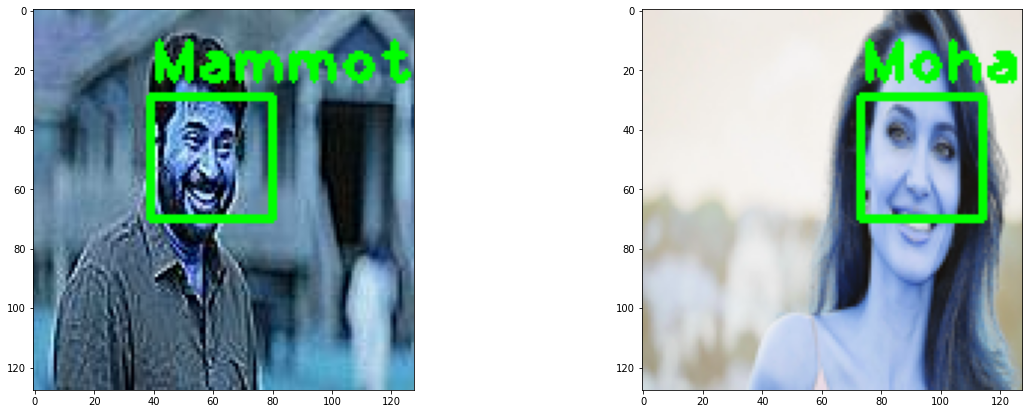

In [16]:
print("Predicting images...")


test_img1 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\testing_org\\15.jpg")
test_img2 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\testing_org\\21.jpg")


new_img1 = test_img1.resize((128,128))
new_img2 = test_img2.resize((128,128))
    
img_arr1=np.array(new_img1)
img_arr2=np.array(new_img2)
    


predicted_img1 = predict(img_arr1)
predicted_img2 = predict(img_arr2)

print("Prediction complete")

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.imshow(cv2.cvtColor(predicted_img1, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(predicted_img2, cv2.COLOR_BGR2RGB))


cv2.imshow("Face Recognition test", predicted_img1)
cv2.imshow("Face Recognition test", predicted_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()



# 4) CNN

In [44]:
data=[]


for i in range(1,40):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s1\\'+str(i)+'.jpg')
    image_arr1 = np.array(img1)
    data.append([image_arr1,0])

    
for i in range(1,46):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s2\\'+str(i)+'.jpg')
    image_arr2 = np.array(img2)
    data.append([image_arr2,1])

       
    
for i in range(1,32):
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s3\\'+str(i)+'.jpg')
    image_arr3 = np.array(img3)
    data.append([image_arr3,2])

 
    
for i in range(1,30):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s4\\'+str(i)+'.jpg')
    image_arr4 = np.array(img4)
    data.append([image_arr4,3])
    
    

print(data)

[[array([[[  0,   1,   0],
        [251, 253, 252],
        [156, 158, 157],
        ...,
        [177, 179, 178],
        [200, 202, 201],
        [ 98, 100,  99]],

       [[  0,   1,   0],
        [251, 253, 252],
        [156, 158, 157],
        ...,
        [177, 179, 178],
        [200, 202, 201],
        [ 98, 100,  99]],

       [[  0,   1,   0],
        [252, 254, 253],
        [156, 158, 157],
        ...,
        [178, 180, 179],
        [201, 203, 202],
        [ 99, 101, 100]],

       ...,

       [[ 19,   5,   0],
        [255, 252, 236],
        [220, 198, 177],
        ...,
        [  0,   0,   5],
        [  0,   1,   6],
        [ 10,  11,  16]],

       [[ 20,   6,   0],
        [255, 252, 236],
        [221, 199, 178],
        ...,
        [ 16,  17,  22],
        [  3,   4,   9],
        [  0,   1,   6]],

       [[ 20,   6,   0],
        [255, 252, 236],
        [221, 199, 178],
        ...,
        [ 32,  33,  38],
        [ 11,  12,  17],
        [  0,   1,   6

In [45]:
data2=[]


for i in range(1,15):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\testing_data\\s1\\'+str(i)+'.jpg')
    new_image1 = img1.resize((128,128))
    image_arr1 = np.array(new_image1)
    data2.append([image_arr1,0])



    
for i in range(1,11):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\testing_data\\s2\\'+str(i)+'.jpg')
    new_image2 = img2.resize((128,128))
    image_arr2 = np.array(new_image2)
    data2.append([image_arr2,1])

      
    
for i in range(1,11):
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\testing_data\\s3\\'+str(i)+'.jpg')
    new_image3 = img3.resize((128,128))
    image_arr3 = np.array(new_image3)
    data2.append([image_arr3,2])


    
    
for i in range(1,11):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\testing_data\\s4\\'+str(i)+'.jpg')
    new_image4 = img4.resize((128,128))
    image_arr4 = np.array(new_image4)
    data2.append([image_arr4,3])
    
    

print(data2)

[[array([[[77, 37, 14],
        [80, 38, 15],
        [84, 40, 15],
        ...,
        [51, 22,  4],
        [51, 20,  4],
        [55, 22,  4]],

       [[79, 39, 13],
        [77, 38, 13],
        [80, 38, 12],
        ...,
        [56, 22,  4],
        [54, 21,  4],
        [55, 22,  4]],

       [[82, 40, 14],
        [79, 38, 12],
        [77, 38, 13],
        ...,
        [56, 22,  3],
        [58, 23,  7],
        [56, 22,  5]],

       ...,

       [[91, 52, 17],
        [90, 51, 19],
        [93, 52, 22],
        ...,
        [74, 32, 13],
        [75, 31, 12],
        [75, 31,  8]],

       [[93, 54, 19],
        [90, 49, 16],
        [92, 52, 23],
        ...,
        [71, 31,  9],
        [74, 32, 10],
        [75, 32, 12]],

       [[89, 52, 15],
        [97, 59, 25],
        [91, 53, 22],
        ...,
        [71, 30,  8],
        [72, 31,  7],
        [72, 31, 10]]], dtype=uint8), 0], [array([[[162, 129, 136],
        [163, 133, 139],
        [164, 137, 147],
        .

In [46]:
import random 
random.shuffle(data)
random.shuffle(data2)

X_train =[]
y_train =[]
for features, label in data:
  X_train.append(features)
  y_train.append(label)
  
X_train = np.array(X_train).reshape(-1,128,128,3)


X_test =[]
y_test =[]
for features, label in data2:
  X_test.append(features)
  y_test.append(label)
  
X_test = np.array(X_test).reshape(-1,128,128,3)


X_train = X_train.astype('float32')

X_train /= 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,4)
y_test = np_utils.to_categorical(y_test,4)

Using TensorFlow backend.


In [47]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128,128,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128,128,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128,128,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(128,128,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(128,128,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(units=4, activation="softmax"))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [48]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        1

In [49]:
hist= cnn.fit(X_train, y_train, batch_size =50, epochs =20, verbose = 1, validation_data = (X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 144 samples, validate on 44 samples
Epoch 1/20
144/144 [==============================] - 3s 18ms/sample - loss: 0.5619 - acc: 0.7500 - val_loss: 5.5641 - val_acc: 0.6136
Epoch 2/20
144/144 [==============================] - 2s 12ms/sample - loss: 0.5568 - acc: 0.7500 - val_loss: 5.9257 - val_acc: 0.6136
Epoch 3/20
144/144 [==============================] - 2s 12ms/sample - loss: 0.5553 - acc: 0.7500 - val_loss: 5.9257 - val_acc: 0.6136
Epoch 4/20
144/144 [==============================] - 2s 12ms/sample - loss: 0.5510 - acc: 0.7500 - val_loss: 5.3350 - val_acc: 0.6250
Epoch 5/20
144/144 [==============================] - 2s 12ms/sample - loss: 0.5491 - acc: 0.7500 - val_loss: 4.8441 - val_acc: 0.6591
Epoch 6/20
144/144 [==============================] - 2s 12ms/sample - loss: 0.5404 - acc: 0.7500 - val_loss: 4.6371 - val_acc: 0.6705
Epoch 7/20
144/144 [==============================]

In [50]:
score = cnn.evaluate(X_test, y_test, verbose = 0)
print("Test accuracy: ", score[1]*100)

score_cnn_w= score[1]*100

Test accuracy:  80.68181872367859


# 5) ML

In [63]:
neutral = []
categ=[]

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

for i in range(1,40):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\train_org\\s1\\'+str(i)+'.jpg')
    
    
    img1 = img1.resize((128,128), im.ANTIALIAS)
    
    
    image_arr1 = np.array(img1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    
    
    
    
    img6=  image_sharp1.flatten()
   
    
    
    neutral.append(img6)
    categ.append(0)
    
for i in range(1,45):
    
    
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\train_org\\s2\\'+str(i)+'.jpg')
   
    
    img2 = img2.resize((128,128), im.ANTIALIAS)
    
    
    image_arr2 = np.array(img2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    

    img7 = image_sharp2.flatten()
    
    neutral.append(img7)
    categ.append(1)
   

for i in range(1,32):
    
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\train_org\\s3\\'+str(i)+'.jpg')
    
    img3 = img3.resize((128,128), im.ANTIALIAS)
    

    image_arr3 = np.array(img3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    

    img8 = image_sharp3.flatten()
    
    neutral.append(img8)
    categ.append(2)
    

for i in range(1,30):
    
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\train_org\\s4\\'+str(i)+'.jpg')
    

    img4 = img4.resize((128,128), im.ANTIALIAS)
    

    image_arr4 = np.array(img4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    

    img9 =  image_sharp4.flatten()
    

    neutral.append(img9)
    categ.append(3)



In [65]:
import pandas as pd
neut=np.array(neutral)

df=pd.DataFrame(neut)

target=np.array(categ)

df['Target']=target

x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train=x
y_train=y



In [66]:
n2=[]
c2=[]

for i in range(1,10):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\test _Fischer\\s1\\'+str(i)+'.jpg')
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\test _Fischer\\s2\\'+str(i)+'.jpg')
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\test _Fischer\\s3\\'+str(i)+'.jpg')
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\test _Fischer\\s4\\'+str(i)+'.jpg')
    
    
    img1 = img1.resize((128,128), im.ANTIALIAS)
    img2 = img2.resize((128,128), im.ANTIALIAS)
    img3 = img3.resize((128,128), im.ANTIALIAS)
    img4 = img4.resize((128,128), im.ANTIALIAS)
    
    
    image_arr1 = np.array(img1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    
    image_arr2 = np.array(img2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
   
    
    image_arr3 = np.array(img3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    
    
    image_arr4 = np.array(img4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    
    
    
    img6=  image_sharp1.flatten()
    img7 = image_sharp2.flatten()
    img8 = image_sharp3.flatten()
    img9 =  image_sharp4.flatten()
    
    
    n2.append(img6)
    c2.append(0)
    n2.append(img7)
    c2.append(1)
    n2.append(img8)
    c2.append(2)
    n2.append(img9)
    c2.append(3)








In [67]:
n2=np.array(n2)
c2=np.array(c2)

df2=pd.DataFrame(n2)

target=np.array(c2)

df2['Target']=target

x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

x_test=x
y_test=y

In [70]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}

In [73]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

acc_ml_w=accuracy_score(y_pred,y_test)*100

The model is 83.33333333333334% accurate


# Step2 : Using Image Processing Technique

## 1) Using Enhanced Laplacian Filter

In [17]:
print("Preparing data...")
faces, labels = prepare_training_data("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\training-data-fischer_sharpening")
print("Data prepared")

print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparing data...
Data prepared
Total faces:  132
Total labels:  132


## 1) LBPH Algorithm

In [18]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
faces=np.array(faces)
labels=np.array(labels)

face_recognizer.train(faces,labels)

p=[]

for i in range(1,45):
    
    test_img1 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\testing_sharpening\\"+str(i)+".jpg")
    new_img1 = test_img1.resize((128,128))
    img_arr1=np.array(new_img1)
    
    img = img_arr1.copy()
    
    face, rect = detect_face(img)
    
    label= face_recognizer.predict(face)
    
    p.append(label[0])
    
    print(label[0])
    

    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
  
g=[1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]

c=0
for i in range(44):
    
    if(p[i]==g[i]):
        
       c=c+1
    
print("Accuracy Achieved is "+str(c*100/44)+"%")

acc_lb_lapl=c*100/44

1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
3
1
2
2
4
1
2
3
4
1
2
3
4
1
2
3
3
1
2
3
4
1
2
3
4
1
2
3
4
Accuracy Achieved is 93.18181818181819%


In [19]:
def predict(test_img):
    
    img = test_img.copy()
    
    face, rect = detect_face(img)
    

    
    label= face_recognizer.predict(face)
    
    print(label[0])
    
    
    
    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    return img

Predicting images...
3
1
Prediction complete


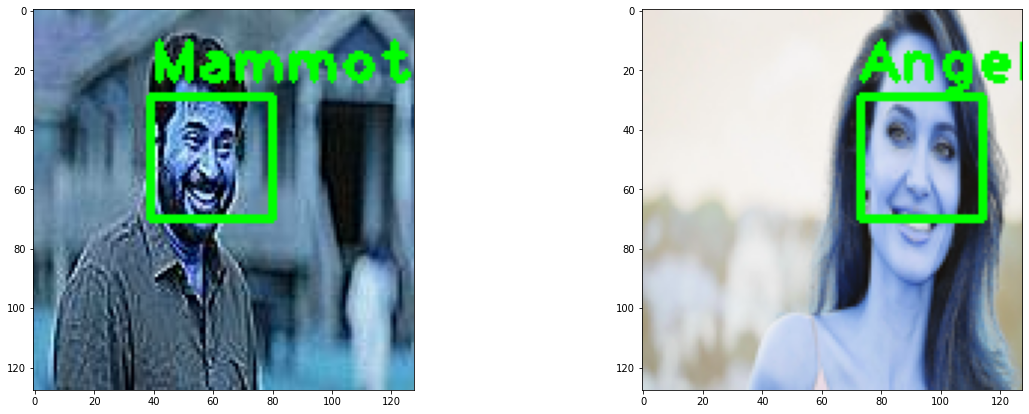

In [20]:
print("Predicting images...")


test_img1 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\testing_org\\15.jpg")
test_img2 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\org\\testing_org\\21.jpg")


new_img1 = test_img1.resize((128,128))
new_img2 = test_img2.resize((128,128))
    
img_arr1=np.array(new_img1)
img_arr2=np.array(new_img2)
    


predicted_img1 = predict(img_arr1)
predicted_img2 = predict(img_arr2)

print("Prediction complete")

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.imshow(cv2.cvtColor(predicted_img1, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(predicted_img2, cv2.COLOR_BGR2RGB))


cv2.imshow("Face Recognition test", predicted_img1)
cv2.imshow("Face Recognition test", predicted_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()



## 2) EigenFace Algorithm

In [21]:
face_recognizer = cv2.face.EigenFaceRecognizer_create()
faces=np.array(faces)
labels=np.array(labels)

face_recognizer.train(faces,labels)

p=[]

for i in range(1,45):
    
    test_img1 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\testing_sharpening\\"+str(i)+".jpg")
    new_img1 = test_img1.resize((128,128))
    img_arr1=np.array(new_img1)
    
    img = img_arr1.copy()
    
    face, rect = detect_face(img)
    
    label= face_recognizer.predict(face)
    
    p.append(label[0])
    
    print(label[0])
    

    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
  
g=[1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]

c=0
for i in range(44):
    
    if(p[i]==g[i]):
        
       c=c+1
    
print("Accuracy Achieved is "+str(c*100/44)+"%")

acc_eigen_lapl=c*100/44

1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
2
3
4
3
2
3
4
1
2
3
4
1
2
3
2
1
2
3
3
1
2
3
4
1
2
3
4
Accuracy Achieved is 90.9090909090909%


## 3) Fisherface Algorithm

In [23]:
face_recognizer = cv2.face.FisherFaceRecognizer_create()
faces=np.array(faces)
labels=np.array(labels)

face_recognizer.train(faces,labels)

p=[]

for i in range(1,45):
    
    test_img1 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\testing_sharpening\\"+str(i)+".jpg")
    new_img1 = test_img1.resize((128,128))
    img_arr1=np.array(new_img1)
    
    img = img_arr1.copy()
    
    face, rect = detect_face(img)
    
    label= face_recognizer.predict(face)
    
    p.append(label[0])
    
    print(label[0])
    

    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
  
g=[1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]

c=0
for i in range(44):
    
    if(p[i]==g[i]):
        
       c=c+1
    
print("Accuracy Achieved is "+str(c*100/44)+"%")

acc_fisher_lapl=c*100/44

1
2
3
4
4
2
3
4
1
2
3
3
4
2
3
4
4
2
2
4
4
2
3
1
1
2
3
4
1
2
3
3
4
3
3
2
1
2
3
4
1
2
3
4
Accuracy Achieved is 75.0%


## 4) CNN

In [51]:
data=[]
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

for i in range(1,40):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s1\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data.append([image_sharp1,0])


for i in range(1,101):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s1\\output\\1 ('+str(i)+').jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data.append([image_sharp1,0])


    
for i in range(1,46):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s2\\'+str(i)+'.jpg')
    new_image2 = img2.resize((256,256))
    image_arr2 = np.array(new_image2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    data.append([image_sharp2,1])

    
for i in range(1,101):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s2\\output\\1 ('+str(i)+').jpg')
    new_image2 = img2.resize((256,256))
    image_arr2 = np.array(new_image2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    data.append([image_sharp2,1])
    
    
for i in range(1,32):
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s3\\'+str(i)+'.jpg')
    new_image3 = img3.resize((256,256))
    image_arr3 = np.array(new_image3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    data.append([image_sharp3,2])


for i in range(1,101):
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s3\\output\\1 ('+str(i)+').jpg')
    new_image3 = img3.resize((256,256))
    image_arr3 = np.array(new_image3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    data.append([image_sharp3,2])
    
    
for i in range(1,30):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s4\\'+str(i)+'.jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    data.append([image_sharp4,3])
    

for i in range(1,101):
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s4\\output\\1 ('+str(i)+').jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    data.append([image_sharp4,3])
    
    

print(data)

[[array([[[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [216, 218, 217],
        [ 86,  88,  87],
        [ 31,  33,  32]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [216, 218, 217],
        [ 86,  88,  87],
        [ 31,  33,  32]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [216, 218, 217],
        [ 86,  88,  87],
        [ 31,  33,  32]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  0,   0,   1],
        [  0,   0,   3],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  5,   6,  11],
        [  0,   0,   4],
        [  0,   0,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  9,  10,  15],
        [  0,   2,   7],
        [  0,   0,   0

In [52]:
data2=[]

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])


for i in range(1,15):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\testing_data\\s1\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    image_arr1 = np.array(new_image1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    data2.append([image_sharp1,0])



    
for i in range(1,11):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\testing_data\\s2\\'+str(i)+'.jpg')
    new_image2 = img2.resize((256,256))
    image_arr2 = np.array(new_image2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    data2.append([image_sharp2,1])


      
    
for i in range(1,11):
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\testing_data\\s3\\'+str(i)+'.jpg')
    new_image3 = img3.resize((256,256))
    image_arr3 = np.array(new_image3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    data2.append([image_sharp3,2])


    
    
for i in range(1,11):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\testing_data\\s4\\'+str(i)+'.jpg')
    new_image4 = img4.resize((256,256))
    image_arr4 = np.array(new_image4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    data2.append([image_sharp4,3])

    
    

print(data2)

[[array([[[ 81,  40,   0],
        [ 77,  37,  29],
        [ 90,  41,  23],
        ...,
        [ 43,  16,   0],
        [ 76,  47,  27],
        [ 55,  14,   0]],

       [[ 94,  42,  29],
        [ 59,  30,   0],
        [ 81,  39,  26],
        ...,
        [ 43,  20,   1],
        [ 34,   0,   0],
        [ 75,  35,  10]],

       [[ 81,  35,   9],
        [ 71,  39,   3],
        [ 72,  35,  23],
        ...,
        [ 44,   9,   6],
        [ 64,  34,  15],
        [ 57,  21,   2]],

       ...,

       [[ 92,  52,  18],
        [104,  63,  31],
        [ 93,  55,  11],
        ...,
        [ 79,  27,  13],
        [101,  48,  38],
        [ 56,  35,   2]],

       [[ 87,  46,  11],
        [ 81,  51,  10],
        [ 89,  50,   9],
        ...,
        [ 79,  32,   3],
        [ 73,  26,  11],
        [ 56,  35,  16]],

       [[ 81,  37,   3],
        [ 76,  47,   6],
        [119,  87,  57],
        ...,
        [ 68,  24,   0],
        [ 80,  33,  12],
        [ 64,  24,   0

In [53]:
import random 
random.shuffle(data)
random.shuffle(data2)

X_train =[]
y_train =[]
for features, label in data:
  X_train.append(features)
  y_train.append(label)
  
X_train = np.array(X_train).reshape(-1,256,256,3)

X_test =[]
y_test =[]
for features, label in data2:
  X_test.append(features)
  y_test.append(label)
  
X_test = np.array(X_test).reshape(-1,256,256,3)

X_train = X_train.astype('float32')

X_train /= 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,4)
y_test = np_utils.to_categorical(y_test,4)

In [54]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(units=4, activation="softmax"))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
hist= cnn.fit(X_train, y_train, batch_size =50, epochs =20, verbose = 1, validation_data = (X_test, y_test))

Train on 544 samples, validate on 44 samples
Epoch 1/20
544/544 [==============================] - 30s 54ms/sample - loss: 0.5641 - acc: 0.7500 - val_loss: 1.7770 - val_acc: 0.6364
Epoch 2/20
544/544 [==============================] - 29s 54ms/sample - loss: 0.5558 - acc: 0.7500 - val_loss: 3.0591 - val_acc: 0.7386
Epoch 3/20
544/544 [==============================] - 30s 54ms/sample - loss: 0.4917 - acc: 0.7633 - val_loss: 3.6863 - val_acc: 0.7386
Epoch 4/20
544/544 [==============================] - 30s 55ms/sample - loss: 0.3987 - acc: 0.8028 - val_loss: 2.8202 - val_acc: 0.8068
Epoch 5/20
544/544 [==============================] - 27s 49ms/sample - loss: 0.3141 - acc: 0.8575 - val_loss: 2.3819 - val_acc: 0.8409
Epoch 6/20
544/544 [==============================] - 26s 47ms/sample - loss: 0.2813 - acc: 0.8778 - val_loss: 2.8268 - val_acc: 0.8068
Epoch 7/20
544/544 [==============================] - 26s 47ms/sample - loss: 0.1996 - acc: 0.9223 - val_loss: 1.0457 - val_acc: 0.9318
Epo

In [56]:
score = cnn.evaluate(X_test, y_test, verbose = 0)
print("Test accuracy: ", score[1]*100)

score_cnn_lapl= score[1]*100

Test accuracy:  94.31818127632141


## 5) ML

In [74]:
neutral = []
categ=[]

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

for i in range(1,40):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\training-data-fischer_sharpening\\s1\\'+str(i)+'.jpg')
    
    
    img1 = img1.resize((128,128), im.ANTIALIAS)
    
    
    image_arr1 = np.array(img1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    
    
    
    
    img6=  image_sharp1.flatten()
   
    
    
    neutral.append(img6)
    categ.append(0)
    
for i in range(1,45):
    
    
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\training-data-fischer_sharpening\\s2\\'+str(i)+'.jpg')
   
    
    img2 = img2.resize((128,128), im.ANTIALIAS)
    
    
    image_arr2 = np.array(img2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    

    img7 = image_sharp2.flatten()
    
    neutral.append(img7)
    categ.append(1)
   

for i in range(1,32):
    
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\training-data-fischer_sharpening\\s3\\'+str(i)+'.jpg')
    
    img3 = img3.resize((128,128), im.ANTIALIAS)
    

    image_arr3 = np.array(img3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    

    img8 = image_sharp3.flatten()
    
    neutral.append(img8)
    categ.append(2)
    

for i in range(1,30):
    
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\training-data-fischer_sharpening\\s4\\'+str(i)+'.jpg')
    

    img4 = img4.resize((128,128), im.ANTIALIAS)
    

    image_arr4 = np.array(img4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    

    img9 =  image_sharp4.flatten()
    

    neutral.append(img9)
    categ.append(3)



In [75]:
neut=np.array(neutral)

df=pd.DataFrame(neut)

target=np.array(categ)

df['Target']=target

x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train=x
y_train=y

In [76]:
n2=[]
c2=[]

i=1;

while(i<41):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\testing_sharpening\\'+str(i)+'.jpg')
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\testing_sharpening\\'+str(i+1)+'.jpg')
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\testing_sharpening\\'+str(i+2)+'.jpg')
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\sharpening\\testing_sharpening\\'+str(i+3)+'.jpg')
    
    
    img1 = img1.resize((128,128), im.ANTIALIAS)
    img2 = img2.resize((128,128), im.ANTIALIAS)
    img3 = img3.resize((128,128), im.ANTIALIAS)
    img4 = img4.resize((128,128), im.ANTIALIAS)
    
    
    image_arr1 = np.array(img1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    
    image_arr2 = np.array(img2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
   
    
    image_arr3 = np.array(img3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    
    
    image_arr4 = np.array(img4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    
    
    
    img6=  image_sharp1.flatten()
    img7 = image_sharp2.flatten()
    img8 = image_sharp3.flatten()
    img9 =  image_sharp4.flatten()
    
    
    n2.append(img6)
    c2.append(0)
    n2.append(img7)
    c2.append(1)
    n2.append(img8)
    c2.append(2)
    n2.append(img9)
    c2.append(3)
    
    i=i+4;








In [77]:
n2=np.array(n2)
c2=np.array(c2)

df2=pd.DataFrame(n2)

target=np.array(c2)

df2['Target']=target

x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

x_test=x
y_test=y



In [78]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}

In [81]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 0, 0, 1, 0, 3, 2, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 1, 0, 1, 2, 3])

In [82]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])

In [84]:
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
acc_ml_lapl= accuracy_score(y_pred,y_test)*100


The model is 90.0% accurate


## Using CLAHE

In [24]:
print("Preparing data...")
faces, labels = prepare_training_data("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\clahe\\train_clahe")
print("Data prepared")

print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparing data...
Data prepared
Total faces:  131
Total labels:  131


## 1) LBPH

In [26]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
faces=np.array(faces)
labels=np.array(labels)

face_recognizer.train(faces,labels)

p=[]

for i in range(1,45):
    
    test_img1 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\clahe\\testing\\"+str(i)+".jpg")
    new_img1 = test_img1.resize((128,128))
    img_arr1=np.array(new_img1)
    
    img = img_arr1.copy()
    
    face, rect = detect_face(img)
    
    label= face_recognizer.predict(face)
    
    p.append(label[0])
    
    print(label[0])
    

    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
  
g=[1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]

c=0
for i in range(44):
    
    if(p[i]==g[i]):
        
       c=c+1
    

print("Accuracy Achieved is "+str(c*100/44)+"%")

acc_lb_clahe=c*100/44


4
2
3
4
1
2
3
4
1
1
3
1
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
1
1
2
3
4
1
2
3
4
1
2
3
4
Accuracy Achieved is 90.9090909090909%


### 2) EigenFace Algorithm

In [42]:
face_recognizer = cv2.face.EigenFaceRecognizer_create()
faces=np.array(faces)
labels=np.array(labels)

face_recognizer.train(faces,labels)

p=[]

for i in range(1,45):
    
    test_img1 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\clahe\\testing_clahe\\"+str(i)+".jpg")
    new_img1 = test_img1.resize((256,256))
    img_arr1=np.array(new_img1)
    
    backtorgb = cv2.cvtColor(img_arr1,cv2.COLOR_GRAY2RGB)
    
    img = backtorgb.copy()
    
    face, rect = detect_face(img)
    
    label= face_recognizer.predict(face)
    
    p.append(label[0])
    
    print(label[0])
    

    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
  
g=[1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]

c=0
for i in range(44):
    
    if(p[i]==g[i]):
        
       c=c+1
    

print("Accuracy Achieved is "+str(c*100/44)+"%")

acc_eigen_clahe=c*100/44


4
2
3
4
1
2
3
4
1
4
3
4
1
2
3
4
1
2
4
4
1
2
3
4
1
4
3
4
1
2
3
4
1
4
3
1
1
2
3
4
1
2
3
4
Accuracy Achieved is 86.36363636363636%


### 3) Fisherface Algorithm

In [43]:
face_recognizer = cv2.face.FisherFaceRecognizer_create()
faces=np.array(faces)
labels=np.array(labels)

face_recognizer.train(faces,labels)

p=[]

for i in range(1,45):
    
    test_img1 = im.open("C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\clahe\\testing_clahe\\"+str(i)+".jpg")
    new_img1 = test_img1.resize((256,256))
    img_arr1=np.array(new_img1)
    
    backtorgb = cv2.cvtColor(img_arr1,cv2.COLOR_GRAY2RGB)
    
    img = backtorgb.copy()
    
    face, rect = detect_face(img)
    
    label= face_recognizer.predict(face)
    
    p.append(label[0])
    
    print(label[0])
    

    label_text = subjects[label[0]]
    
    
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    
  
g=[1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]

c=0
for i in range(44):
    
    if(p[i]==g[i]):
        
       c=c+1
    

print("Accuracy Achieved is "+str(c*100/44)+"%")

acc_fisher_clahe=c*100/44


2
2
3
3
1
2
3
2
1
2
2
1
2
2
3
1
2
3
3
3
1
4
2
1
1
4
2
2
4
2
3
2
2
3
3
3
3
2
1
3
1
1
3
1
Accuracy Achieved is 40.90909090909091%


## 4) CNN

In [57]:
data=[]


for i in range(1,40):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s1\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    data4=[]
    data4 = np.asarray(new_image1)
    gray_img1=cv2.cvtColor(data4,cv2.COLOR_BGR2GRAY)
    gray_img1_eqhist=cv2.equalizeHist(gray_img1)
    clahe=cv2.createCLAHE(clipLimit=40)
    gray_img1_clahe=clahe.apply(gray_img1_eqhist)
    backtorgb = cv2.cvtColor(gray_img1_clahe,cv2.COLOR_GRAY2RGB)
    data.append([backtorgb,0])

for i in range(1,101):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s1\\output\\1 ('+str(i)+').jpg')
    new_image1 = img1.resize((256,256))
    data4=[]
    data4 = np.asarray(new_image1)
    gray_img1=cv2.cvtColor(data4,cv2.COLOR_BGR2GRAY)
    gray_img1_eqhist=cv2.equalizeHist(gray_img1)
    clahe=cv2.createCLAHE(clipLimit=40)
    gray_img1_clahe=clahe.apply(gray_img1_eqhist)
    backtorgb = cv2.cvtColor(gray_img1_clahe,cv2.COLOR_GRAY2RGB)
    data.append([backtorgb,0])


    
for i in range(1,46):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s2\\'+str(i)+'.jpg')
    new_image2 = img2.resize((256,256))
    data4=[]
    data4 = np.asarray(new_image2)
    gray_img1=cv2.cvtColor(data4,cv2.COLOR_BGR2GRAY)
    gray_img1_eqhist=cv2.equalizeHist(gray_img1)
    clahe=cv2.createCLAHE(clipLimit=40)
    gray_img1_clahe=clahe.apply(gray_img1_eqhist)
    backtorgb = cv2.cvtColor(gray_img1_clahe,cv2.COLOR_GRAY2RGB)
    data.append([backtorgb,1])

    
for i in range(1,101):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s2\\output\\1 ('+str(i)+').jpg')
    new_image2 = img2.resize((256,256))
    data4=[]
    data4 = np.asarray(new_image2)
    gray_img1=cv2.cvtColor(data4,cv2.COLOR_BGR2GRAY)
    gray_img1_eqhist=cv2.equalizeHist(gray_img1)
    clahe=cv2.createCLAHE(clipLimit=40)
    gray_img1_clahe=clahe.apply(gray_img1_eqhist)
    backtorgb = cv2.cvtColor(gray_img1_clahe,cv2.COLOR_GRAY2RGB)
    data.append([backtorgb,1])
    
    
    
for i in range(1,32):
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s3\\'+str(i)+'.jpg')
    new_image3 = img3.resize((256,256))
    data4=[]
    data4 = np.asarray(new_image3)
    gray_img1=cv2.cvtColor(data4,cv2.COLOR_BGR2GRAY)
    gray_img1_eqhist=cv2.equalizeHist(gray_img1)
    clahe=cv2.createCLAHE(clipLimit=40)
    gray_img1_clahe=clahe.apply(gray_img1_eqhist)
    backtorgb = cv2.cvtColor(gray_img1_clahe,cv2.COLOR_GRAY2RGB)
    data.append([backtorgb,2])
    


for i in range(1,101):
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s3\\output\\1 ('+str(i)+').jpg')
    new_image3 = img3.resize((256,256))
    data4=[]
    data4 = np.asarray(new_image3)
    gray_img1=cv2.cvtColor(data4,cv2.COLOR_BGR2GRAY)
    gray_img1_eqhist=cv2.equalizeHist(gray_img1)
    clahe=cv2.createCLAHE(clipLimit=40)
    gray_img1_clahe=clahe.apply(gray_img1_eqhist)
    backtorgb = cv2.cvtColor(gray_img1_clahe,cv2.COLOR_GRAY2RGB)
    data.append([backtorgb,2])

    
    
for i in range(1,30):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s4\\'+str(i)+'.jpg')
    new_image4 = img4.resize((256,256))
    data4=[]
    data4 = np.asarray(new_image4)
    gray_img1=cv2.cvtColor(data4,cv2.COLOR_BGR2GRAY)
    gray_img1_eqhist=cv2.equalizeHist(gray_img1)
    clahe=cv2.createCLAHE(clipLimit=40)
    gray_img1_clahe=clahe.apply(gray_img1_eqhist)
    backtorgb = cv2.cvtColor(gray_img1_clahe,cv2.COLOR_GRAY2RGB)
    data.append([backtorgb,3])
    

for i in range(1,101):
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\training-data\\s4\\output\\1 ('+str(i)+').jpg')
    new_image4 = img4.resize((256,256))
    data4=[]
    data4 = np.asarray(new_image4)
    gray_img1=cv2.cvtColor(data4,cv2.COLOR_BGR2GRAY)
    gray_img1_eqhist=cv2.equalizeHist(gray_img1)
    clahe=cv2.createCLAHE(clipLimit=40)
    gray_img1_clahe=clahe.apply(gray_img1_eqhist)
    backtorgb = cv2.cvtColor(gray_img1_clahe,cv2.COLOR_GRAY2RGB)
    data.append([backtorgb,3])
    
    

print(data)

[[array([[[  8,   8,   8],
        [ 16,  16,  16],
        [240, 240, 240],
        ...,
        [196, 196, 196],
        [ 13,  13,  13],
        [  7,   7,   7]],

       [[  8,   8,   8],
        [ 16,  16,  16],
        [240, 240, 240],
        ...,
        [196, 196, 196],
        [ 13,  13,  13],
        [  7,   7,   7]],

       [[  8,   8,   8],
        [ 16,  16,  16],
        [240, 240, 240],
        ...,
        [196, 196, 196],
        [ 13,  13,  13],
        [  7,   7,   7]],

       ...,

       [[  8,   8,   8],
        [ 16,  16,  16],
        [148, 148, 148],
        ...,
        [ 55,  55,  55],
        [ 30,  30,  30],
        [ 17,  17,  17]],

       [[  8,   8,   8],
        [ 16,  16,  16],
        [148, 148, 148],
        ...,
        [ 81,  81,  81],
        [ 44,  44,  44],
        [ 17,  17,  17]],

       [[  8,   8,   8],
        [ 16,  16,  16],
        [148, 148, 148],
        ...,
        [ 92,  92,  92],
        [ 55,  55,  55],
        [ 17,  17,  17

In [58]:
data2=[]


for i in range(1,15):
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\testing_data\\s1\\'+str(i)+'.jpg')
    new_image1 = img1.resize((256,256))
    data4=[]
    data4 = np.asarray(new_image1)
    gray_img1=cv2.cvtColor(data4,cv2.COLOR_BGR2GRAY)
    gray_img1_eqhist=cv2.equalizeHist(gray_img1)
    clahe=cv2.createCLAHE(clipLimit=40)
    gray_img1_clahe=clahe.apply(gray_img1_eqhist)
    backtorgb = cv2.cvtColor(gray_img1_clahe,cv2.COLOR_GRAY2RGB)
    data2.append([backtorgb,0])
    



    
for i in range(1,11):
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\testing_data\\s2\\'+str(i)+'.jpg')
    new_image2 = img2.resize((256,256))
    data4=[]
    data4 = np.asarray(new_image2)
    gray_img1=cv2.cvtColor(data4,cv2.COLOR_BGR2GRAY)
    gray_img1_eqhist=cv2.equalizeHist(gray_img1)
    clahe=cv2.createCLAHE(clipLimit=40)
    gray_img1_clahe=clahe.apply(gray_img1_eqhist)
    backtorgb = cv2.cvtColor(gray_img1_clahe,cv2.COLOR_GRAY2RGB)
    data2.append([backtorgb,1])


      
    
for i in range(1,11):
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\testing_data\\s3\\'+str(i)+'.jpg')
    new_image3 = img3.resize((256,256))
    data4=[]
    data4 = np.asarray(new_image3)
    gray_img1=cv2.cvtColor(data4,cv2.COLOR_BGR2GRAY)
    gray_img1_eqhist=cv2.equalizeHist(gray_img1)
    clahe=cv2.createCLAHE(clipLimit=40)
    gray_img1_clahe=clahe.apply(gray_img1_eqhist)
    backtorgb = cv2.cvtColor(gray_img1_clahe,cv2.COLOR_GRAY2RGB)
    data2.append([backtorgb,2])


    
    
for i in range(1,11):
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\testing_data\\s4\\'+str(i)+'.jpg')
    new_image4 = img4.resize((256,256))
    data4=[]
    data4 = np.asarray(new_image4)
    gray_img1=cv2.cvtColor(data4,cv2.COLOR_BGR2GRAY)
    gray_img1_eqhist=cv2.equalizeHist(gray_img1)
    clahe=cv2.createCLAHE(clipLimit=40)
    gray_img1_clahe=clahe.apply(gray_img1_eqhist)
    backtorgb = cv2.cvtColor(gray_img1_clahe,cv2.COLOR_GRAY2RGB)
    data2.append([backtorgb,3])

    
    

print(data2)

[[array([[[203, 203, 203],
        [203, 203, 203],
        [241, 241, 241],
        ...,
        [ 57,  57,  57],
        [233, 233, 233],
        [137, 137, 137]],

       [[226, 226, 226],
        [140, 140, 140],
        [203, 203, 203],
        ...,
        [ 57,  57,  57],
        [ 27,  27,  27],
        [178, 178, 178]],

       [[203, 203, 203],
        [170, 170, 170],
        [203, 203, 203],
        ...,
        [ 57,  57,  57],
        [213, 213, 213],
        [137, 137, 137]],

       ...,

       [[158, 158, 158],
        [172, 172, 172],
        [130, 130, 130],
        ...,
        [158, 158, 158],
        [250, 250, 250],
        [198, 198, 198]],

       [[107, 107, 107],
        [130, 130, 130],
        [172, 172, 172],
        ...,
        [118, 118, 118],
        [158, 158, 158],
        [158, 158, 158]],

       [[ 58,  58,  58],
        [130, 130, 130],
        [185, 185, 185],
        ...,
        [ 45,  45,  45],
        [118, 118, 118],
        [ 45,  45,  45

In [59]:
import random 
random.shuffle(data)
random.shuffle(data2)

X_train =[]
y_train =[]
for features, label in data:
  X_train.append(features)
  y_train.append(label)
  
X_train = np.array(X_train)

X_test =[]
y_test =[]
for features, label in data2:
  X_test.append(features)
  y_test.append(label)
  
X_test = np.array(X_test)

X_train = X_train.astype('float32')

X_train /= 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,4)
y_test = np_utils.to_categorical(y_test,4)

In [60]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(256,256,3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(units=4, activation="softmax"))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [61]:
hist= cnn.fit(X_train, y_train, batch_size =50, epochs =20, verbose = 1, validation_data = (X_test, y_test))

Train on 544 samples, validate on 44 samples
Epoch 1/20
544/544 [==============================] - 25s 45ms/sample - loss: 0.5636 - acc: 0.7500 - val_loss: 1.0199 - val_acc: 0.6136
Epoch 2/20
544/544 [==============================] - 24s 45ms/sample - loss: 0.5616 - acc: 0.7500 - val_loss: 0.9287 - val_acc: 0.6989
Epoch 3/20
544/544 [==============================] - 25s 47ms/sample - loss: 0.5557 - acc: 0.7500 - val_loss: 4.5770 - val_acc: 0.6591
Epoch 4/20
544/544 [==============================] - 26s 47ms/sample - loss: 0.5214 - acc: 0.7569 - val_loss: 4.2553 - val_acc: 0.7045
Epoch 5/20
544/544 [==============================] - 26s 49ms/sample - loss: 0.4274 - acc: 0.8093 - val_loss: 4.2110 - val_acc: 0.7159
Epoch 6/20
544/544 [==============================] - 26s 48ms/sample - loss: 0.3098 - acc: 0.8690 - val_loss: 3.2087 - val_acc: 0.7841
Epoch 7/20
544/544 [==============================] - 26s 47ms/sample - loss: 0.1418 - acc: 0.9499 - val_loss: 2.6616 - val_acc: 0.8182
Epo

In [62]:
score = cnn.evaluate(X_test, y_test, verbose = 0)
print("Test accuracy: ", score[1]*100)

score_cnn_clahe=score[1]*100

Test accuracy:  84.09090638160706


## 5) ML

In [85]:
neutral = []
categ=[]

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

for i in range(1,40):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\clahe\\train_clahe\\s1\\'+str(i)+'.jpg')
    
    
    img1 = img1.resize((128,128), im.ANTIALIAS)
    
    
    image_arr1 = np.array(img1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    
    
    
    
    img6=  image_sharp1.flatten()
   
    
    
    neutral.append(img6)
    categ.append(0)
    
for i in range(1,45):
    
    
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\clahe\\train_clahe\\s2\\'+str(i)+'.jpg')
   
    
    img2 = img2.resize((128,128), im.ANTIALIAS)
    
    
    image_arr2 = np.array(img2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
    

    img7 = image_sharp2.flatten()
    
    neutral.append(img7)
    categ.append(1)
   

for i in range(1,32):
    
    
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\clahe\\train_clahe\\s3\\'+str(i)+'.jpg')
    
    img3 = img3.resize((128,128), im.ANTIALIAS)
    

    image_arr3 = np.array(img3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    

    img8 = image_sharp3.flatten()
    
    neutral.append(img8)
    categ.append(2)
    

for i in range(1,30):
    
    
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\clahe\\train_clahe\\s4\\'+str(i)+'.jpg')
    

    img4 = img4.resize((128,128), im.ANTIALIAS)
    

    image_arr4 = np.array(img4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    

    img9 =  image_sharp4.flatten()
    

    neutral.append(img9)
    categ.append(3)



In [86]:
neut=np.array(neutral)

df=pd.DataFrame(neut)

target=np.array(categ)

df['Target']=target

x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train=x
y_train=y

In [87]:
n2=[]
c2=[]

i=1;

while(i<41):
    
    img1 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\clahe\\testing_clahe\\'+str(i)+'.jpg')
    img2 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\clahe\\testing_clahe\\'+str(i+1)+'.jpg')
    img3 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\clahe\\testing_clahe\\'+str(i+2)+'.jpg')
    img4 = im.open('C:\\Users\\Maria\\Desktop\\FRANCIS\\FALL SEM 21-22\\IMP\\our  project\\Dataset\\Fischer\\clahe\\testing_clahe\\'+str(i+3)+'.jpg')
    
    
    img1 = img1.resize((128,128), im.ANTIALIAS)
    img2 = img2.resize((128,128), im.ANTIALIAS)
    img3 = img3.resize((128,128), im.ANTIALIAS)
    img4 = img4.resize((128,128), im.ANTIALIAS)
    
    
    image_arr1 = np.array(img1)
    image_sharp1 = cv2.filter2D(src=image_arr1, ddepth=-1, kernel=kernel)
    
    image_arr2 = np.array(img2)
    image_sharp2 = cv2.filter2D(src=image_arr2, ddepth=-1, kernel=kernel)
   
    
    image_arr3 = np.array(img3)
    image_sharp3 = cv2.filter2D(src=image_arr3, ddepth=-1, kernel=kernel)
    
    
    image_arr4 = np.array(img4)
    image_sharp4 = cv2.filter2D(src=image_arr4, ddepth=-1, kernel=kernel)
    
    
    
    img6=  image_sharp1.flatten()
    img7 = image_sharp2.flatten()
    img8 = image_sharp3.flatten()
    img9 =  image_sharp4.flatten()
    
    
    n2.append(img6)
    c2.append(0)
    n2.append(img7)
    c2.append(1)
    n2.append(img8)
    c2.append(2)
    n2.append(img9)
    c2.append(3)
    
    i=i+4;








In [88]:
n2=np.array(n2)
c2=np.array(c2)

df2=pd.DataFrame(n2)

target=np.array(c2)

df2['Target']=target

x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

x_test=x
y_test=y


In [89]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}

In [91]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 1, 0, 1, 1, 3, 1, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 3])

In [92]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])

In [93]:
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

acc_ml_clahe=accuracy_score(y_pred,y_test)*100

The model is 85.0% accurate


# EVALUATION OF PERFORMANCES

## 1) LBPH

In [95]:
scores = [acc_lb_w,acc_lb_lapl,acc_lb_clahe]
algorithms = ["Without IMP","Enhanced Laplacian","CLAHE"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Without IMP is: 88.63636363636364 %
The accuracy score achieved using Enhanced Laplacian is: 93.18181818181819 %
The accuracy score achieved using CLAHE is: 90.9090909090909 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

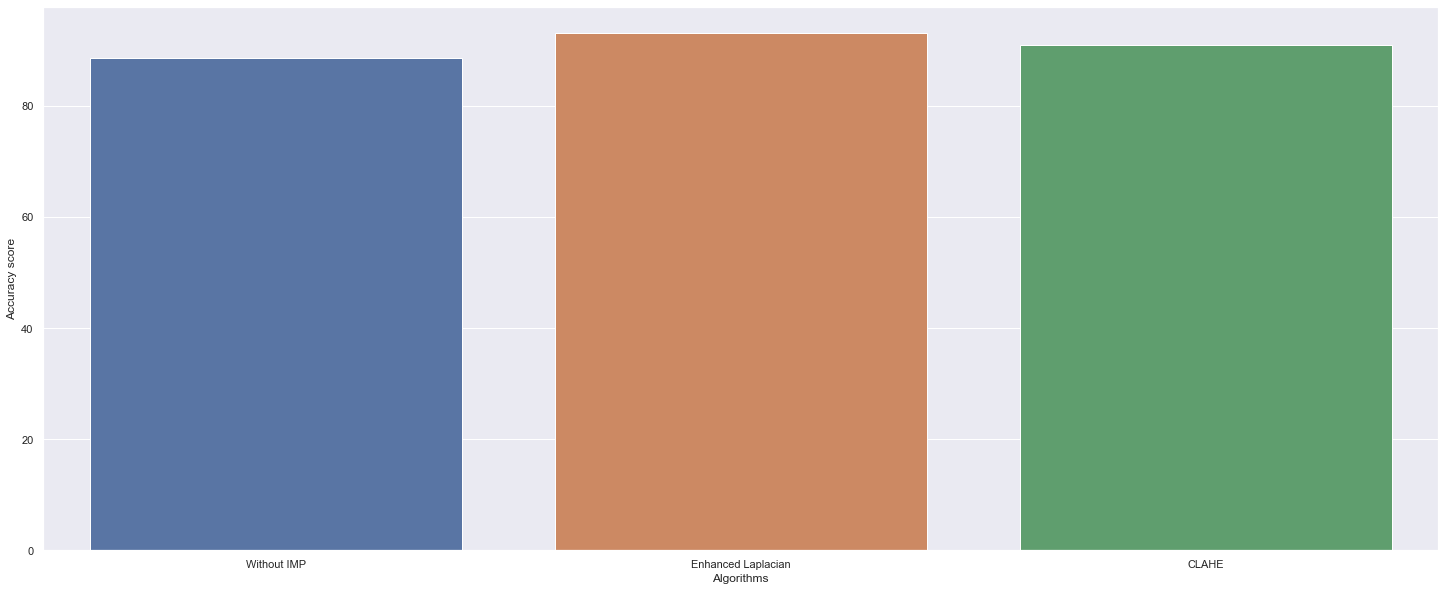

In [97]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## 2) Eigen Face

In [98]:
scores = [acc_eigen_w,acc_eigen_lapl,acc_eigen_clahe]
algorithms = ["Without IMP","Enhanced Laplacian","CLAHE"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Without IMP is: 90.9090909090909 %
The accuracy score achieved using Enhanced Laplacian is: 90.9090909090909 %
The accuracy score achieved using CLAHE is: 86.36363636363636 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

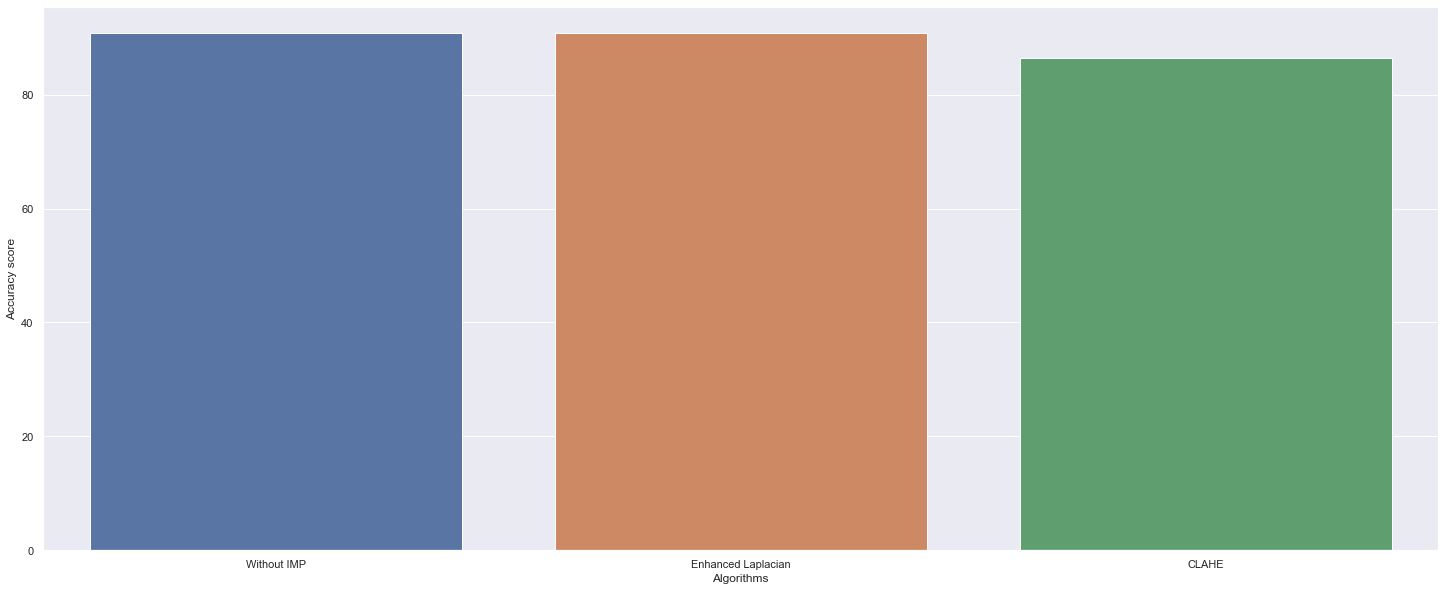

In [99]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## 3) Fisher

In [100]:
scores = [acc_fisher_w,acc_fisher_lapl,acc_fisher_clahe]
algorithms = ["Without IMP","Enhanced Laplacian","CLAHE"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Without IMP is: 63.63636363636363 %
The accuracy score achieved using Enhanced Laplacian is: 75.0 %
The accuracy score achieved using CLAHE is: 40.90909090909091 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

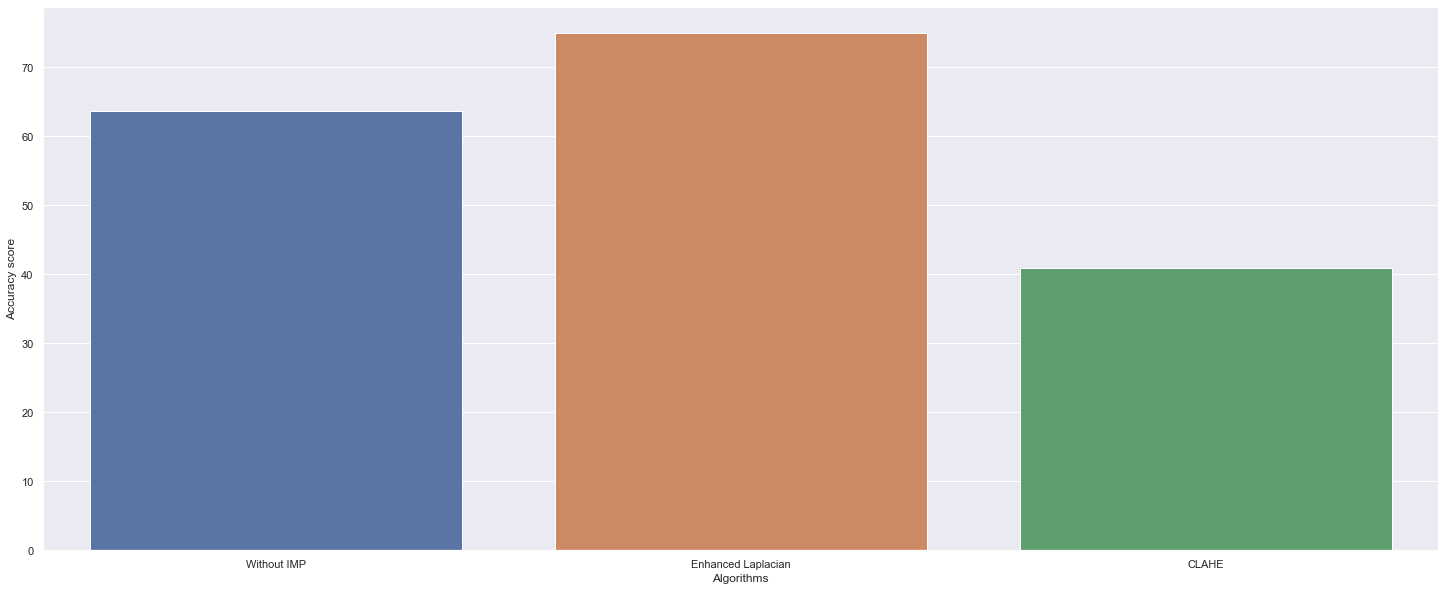

In [101]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## 4) CNN

In [102]:
scores = [score_cnn_w,score_cnn_lapl,score_cnn_clahe]
algorithms = ["Without IMP","Enhanced Laplacian","CLAHE"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Without IMP is: 80.68181872367859 %
The accuracy score achieved using Enhanced Laplacian is: 94.31818127632141 %
The accuracy score achieved using CLAHE is: 84.09090638160706 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

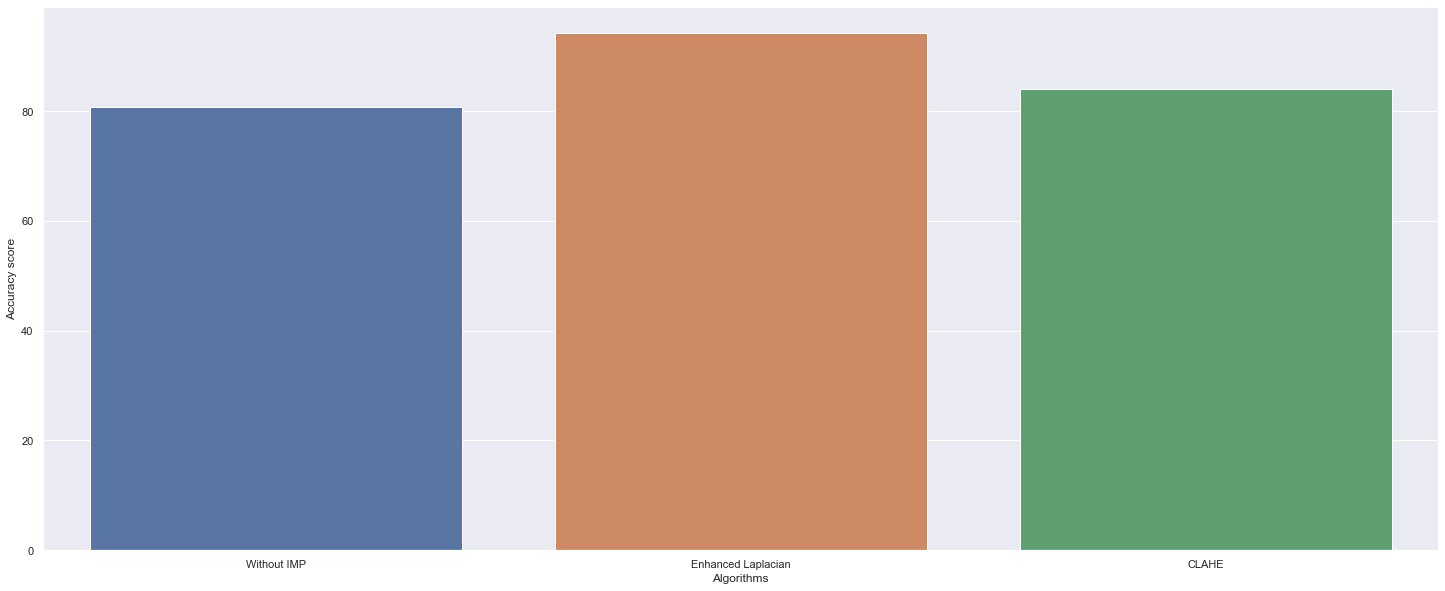

In [103]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

# 5) ML

In [104]:
scores = [acc_ml_w,acc_ml_lapl,acc_ml_clahe]
algorithms = ["Without IMP","Enhanced Laplacian","CLAHE"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Without IMP is: 83.33333333333334 %
The accuracy score achieved using Enhanced Laplacian is: 90.0 %
The accuracy score achieved using CLAHE is: 85.0 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

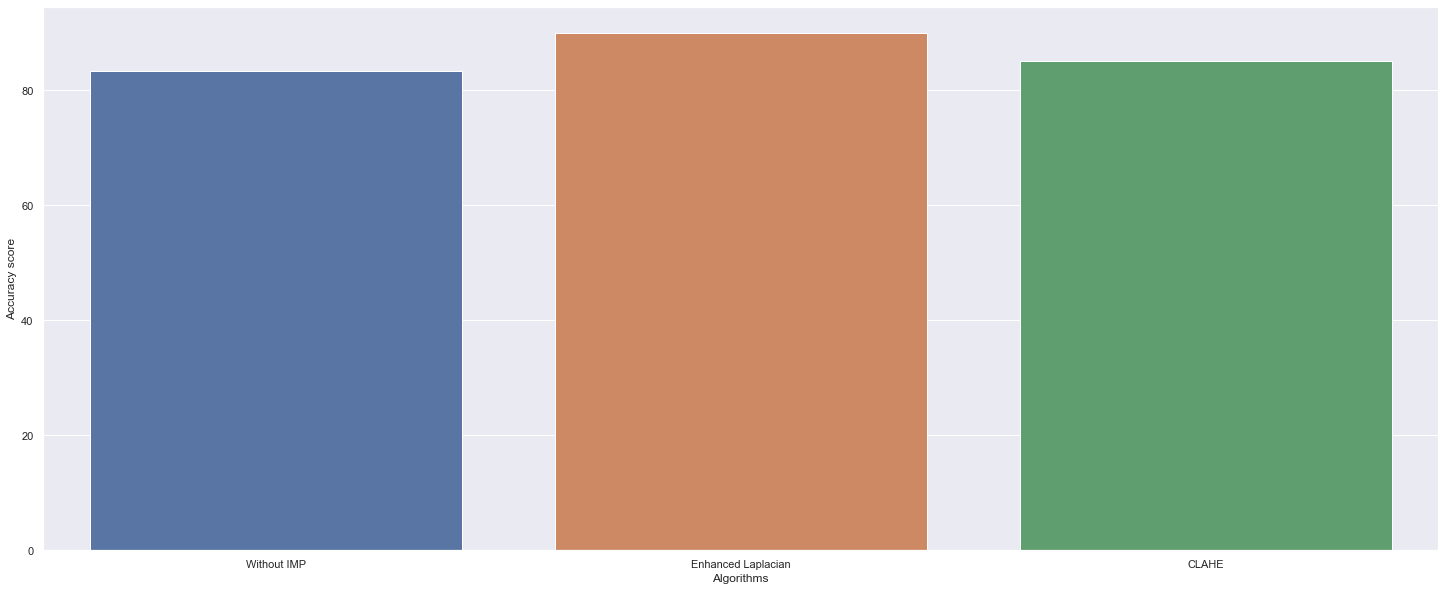

In [105]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)